Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 47s 0us/step
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.8652 - loss: 0.4644 - val_accuracy: 0.7500 - val_loss: 0.6900
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.9467 - loss: 0.1341 - val_accuracy: 0.5625 - val_loss: 0.9562
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.9544 - loss: 0.1154 - val_accuracy: 0.7500 - val_loss: 0.5962
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.9616 - loss: 0.1049 - val_accuracy: 0.7500 - val_loss: 0.5766
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.9621 - loss: 0.0948 - val_accuracy: 0.8750 - val_loss: 0.2457
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.9630 - loss: 0.0897 - val_accuracy: 0.8125 - val_loss: 0.5118
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step -

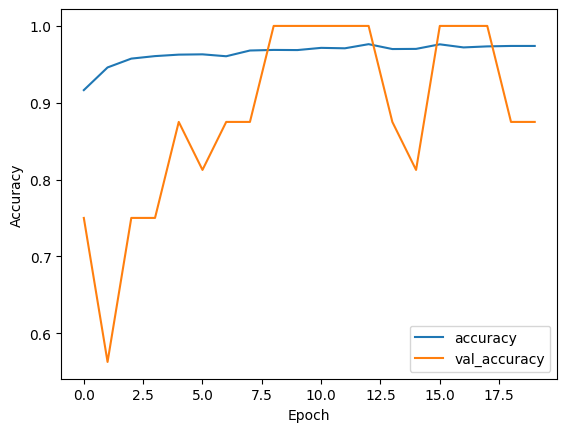

20/20 - 62s - 3s/step - accuracy: 0.8590 - loss: 0.4502
Test Accuracy: 0.8589743375778198


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt

# Define paths to the dataset
train_dir = 'C:/Users/GOWTHAM/Desktop/train_data'
val_dir = 'C:/Users/GOWTHAM/Desktop/validation_data'
test_dir = 'C:/Users/GOWTHAM/Desktop/test_data'

# Parameters
img_width, img_height = 256, 256
batch_size = 32
epochs = 20

# Load and prepare the dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False
)

# Data augmentation (optional)
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the CNN model with transfer learning
model = Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset
)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print("Test Accuracy:", test_acc)